In [83]:
import numpy as np
from igraph import *
import networkx as nx
import time
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import random


def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = matrix.shape[0]

    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i] == 1:
                res[start].append(i)
        start += 1
    return res


def check_time(function, args):
    start = time.time()
    result =function(*args)
    delta = time.time() - start
    #print("seconds : ", delta)
    return result, delta

# Problem I

Generate graph

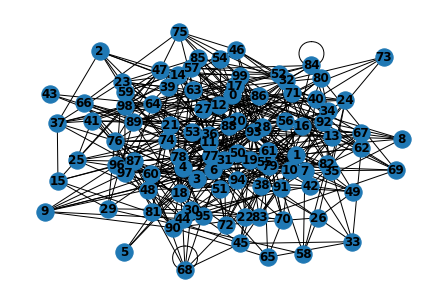

28


In [84]:
VERT = 100
CONN = 500

np.random.seed(1000)
G = nx.Graph()
G.add_nodes_from( np.arange(VERT) )
[ G.add_edge(i, j, weight=k) for i, j, k in zip(np.random.randint(0, VERT, CONN), np.random.randint(0, VERT, CONN), np.random.randint(1, 50, CONN)) ]
#G.add_edges_from( [ (i, j) for i, j in zip(np.random.randint(0, VERT, CONN), np.random.randint(0, VERT, CONN)) ] )
nx.draw(G, with_labels=True, font_weight="bold")
plt.show() 
print(G.adj[0][75]['weight'])

In [85]:
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(G).todense() == nx.linalg.graphmatrix.adjacency_matrix(G).todense().T))
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(G).todense() >= 0))

True
True


In [86]:
target = np.random.randint(0, VERT)
print('target == ', target)

result1, delta1 = check_time(nx.dijkstra_path, args=(G, 0, target))
result2, delta2 = check_time(nx.bellman_ford_path, args=(G, 0, target))
print('paths ', result1, result2)
print('times ', delta1, delta2)

target ==  79
paths  [0, 37, 84, 80, 69, 79] [0, 37, 84, 80, 69, 79]
times  0.0 0.002001047134399414


In [87]:
t1 = 0
t2 = 0
n = 100

for i in range(n):
    target = np.random.randint(0, VERT)
    result1, delta1 = check_time(nx.dijkstra_path, args=(G, 0, target))
    result2, delta2 = check_time(nx.bellman_ford_path, args=(G, 0, target))
    t1 += delta1
    t2 += delta2
print('dijkstra_path = %.3f ms' %(t1 / n * 1000))
print('bellman_ford_path = %.3f ms' % (t2 / n * 1000))

dijkstra_path = 0.350 ms
bellman_ford_path = 1.582 ms


# Problem 2

In [88]:
from pyvis.network import Network

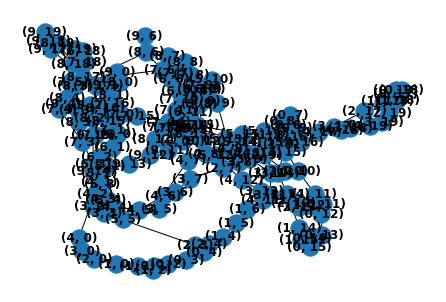

In [89]:
G = nx.grid_2d_graph(10, 20)

for target, source in G.edges():
    G[target][source]['weight'] = round(np.random.random() * 10, 1)
    
obstacles = random.sample(list((G.nodes())), 40)
G.remove_nodes_from(obstacles)

nx.draw(G, with_labels=True, font_weight="bold")
plt.show()

In [115]:
t = 0
n = 5
for i in range(n):
    target = random.choice(list(G.nodes()))
    start = random.choice(list(G.nodes()))
    result, delta = check_time(nx.algorithms.shortest_paths.astar_path, args=(G, start, target))
    t += delta
    
print('A Star = %.3f ms' %(t / n * 1000))

A Star = 0.400 ms


start : (6, 18), target : (1, 2)
path : [(6, 18), (7, 18), (7, 17), (7, 16), (7, 15), (6, 15), (6, 14), (6, 13), (6, 12), (6, 11), (6, 10), (5, 10), (5, 9), (5, 8), (5, 7), (4, 7), (4, 6), (4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2)]


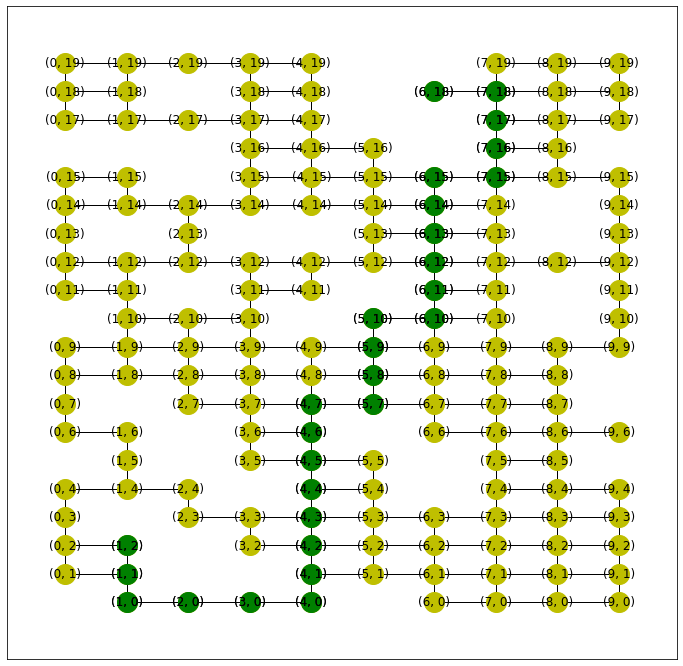

In [121]:
random.seed()
target = (1, 2)#random.choice(list(G.nodes()))
start = (6, 18)#random.choice(list(G.nodes()))

print("start : {}, target : {}".format(start, target))

#path = nx.algorithms.shortest_paths.astar.astar_path(G, start, target)
path = nx.algorithms.shortest_paths.astar_path(G, start, target)

solution = nx.Graph()
solution.add_nodes_from( path )
[ solution.add_edge(path[i - 1], path[i]) for i in range(1, len(path))]

print("path : {}".format(path))

plt.figure(figsize=(12, 12))
nx.drawing.nx_pylab.draw_networkx(G,
                                  node_size=400,
                                  with_labels=True,
                                  font_size=12,
                                  node_color='y',
                                  pos = dict((n, n) for n in G.nodes()))

nx.drawing.nx_pylab.draw_networkx(solution,
                                  node_size=400,
                                  with_labels=True,
                                  font_size=12,
                                  node_color='g',
                                  pos = dict((n, n) for n in solution.nodes()))
plt.savefig("./graph_grid.png")

In [68]:
solution